# Changes in World Happiness Following the COVID-19 Pandemic

The goal of this project is to investigate the changes in world happiness after the COVID-19 pandemic. 

The [dataset](https://www.kaggle.com/code/htester/exploratory-data-analysis/data) used in this project contains updated data from the [World Happiness Report](https://worldhappiness.report/) currated by Kaggle user `mathurinache`. Data was collected over a period of 8 years (2015 to 2022).

## Project Outline
1 - Data Ingestion & Cleaning <br>
2 - Exploratory Data Analysis & Visualization <br>
3 - Happiness Score Prediction using Regression <br>
4 - Clustering Analysis Based on Factors Affecting Happiness <br>
5 - Summary

## Project Summary & Conclusions
<u>Data Curation</u> <br>
Following data ingestion and cleaning, the dataset contained 10 columns and ~1300 records.

|Variables|Description|
|---------|------------|
|`Year`|Reporting year|
|`Country`|Country name|
|`Happiness Score`|Happiness score|
|`Economy (GDP per Capita)`|Score based on the country's gross domestic profit|
|`Family`|Score based on the country's social support systems|
|`Health (Life Expectancy) `|Score based on the country's life expectancy|
|`Freedom`|Score based on the citizen's freedom to make life choices|
|`Trust (Government Corruption)`|Score based on the citizen's perception of corruption in the government|
|`Generosity`|Score based on the citizen's perception of generosity|
|`Happiness Rank`|The country's overall performance relative to other nations|

<u>Data Exploration & Analysis</u> <br>
To investigate differences in global happiness before and after the pandemic, I divided the dataset into two periods (pre: 2015 to 2018 and post: 2019 to 2022). Overall, no significant changes were observed in happiness ranking between both periods. 

Generally, developed countries, including the US, Canada, Australia and Scandinavian countries (Norway, Findland) achieved the highest happiness scores across the globe. On the other hand, third wold countries, particularly African nations, are reportedly the least happy in the world. 

Interestingly, global happiness is highly correlated with a countrie's GDP, which in turn influences other factors considered, including life expectancy and generosity. Therefore, a bias likely exists in the way we as humans determine happiness on the global scale.

In [1]:
# Get the required dependencies
! pip install bubbly
! pip install iplot
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5432 sha256=402973e735f31bfa2d79832e7772f831e0890194139831881a505ddd96da7fbd
  Stored in directory: /root/.cache/pip/wheels/b5/4a/53/7234ca75eea014cea6a7093adc822c77b40ba13de20c6f5d0a
Successfully built bubbly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 7.7 MB/s eta 0:00:00


In [2]:
import os

# Data Ingestion & Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import plot, iplot
from bubbly.bubbly import bubbleplot

# Supervised ML: Regression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Unsupervised ML: Clustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

# Configurations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Ingestion & Cleaning

In [3]:
# Get kaggle API credentials

creds = pd.read_csv('api_keys.csv')
kaggle_creds = creds[creds['NAME']=='kaggle']

os.environ['KAGGLE_USERNAME'] = kaggle_creds['USER'].values[0]
os.environ['KAGGLE_KEY'] = kaggle_creds['KEY'].values[0]

In [4]:
# Download dataset
!kaggle datasets download -d mathurinache/world-happiness-report

100% 67.4k/67.4k [00:00<00:00, 629kB/s]
100% 67.4k/67.4k [00:00<00:00, 628kB/s]


In [5]:
# Unzip file
!unzip world-happiness-report.zip

Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [6]:
df_2015 = pd.read_csv('2015.csv')
df_2015['Year'] = 2015
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [7]:
df_2015.drop(['Standard Error'], axis=1, inplace=True)
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [8]:
df_2016 = pd.read_csv('2016.csv')
df_2016['Year'] = 2016
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [9]:
df_2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [10]:
df_2015.columns == df_2016.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [11]:
df_2017 = pd.read_csv('2017.csv')
df_2017['Year'] = 2017
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [12]:
df_2017.drop(['Whisker.high', 'Whisker.low'], axis=1, inplace=True)

df_2017.rename({'Happiness.Rank':'Happiness Rank', 
                'Happiness.Score':'Happiness Score',
                'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
                'Health..Life.Expectancy.':'Health (Life Expectancy)',
                'Trust..Government.Corruption.':'Trust (Government Corruption)', 
                'Dystopia.Residual': 'Dystopia Residual'}, axis='columns', inplace=True)

df_2017 = df_2017[['Country', 'Happiness Rank', 'Happiness Score',
                   'Economy (GDP per Capita)', 'Family', 
                   'Health (Life Expectancy)','Freedom', 
                   'Trust (Government Corruption)', 'Generosity',
                   'Dystopia Residual', 'Year']].copy()
df_2017.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017


In [13]:
df_2015.drop(['Region'], axis=1, inplace=True)
df_2016.drop(['Region'], axis=1, inplace=True)

df_2015.columns == df_2017.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [14]:
df_2018 = pd.read_csv('2018.csv')
df_2018['Year'] = 2018
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [15]:
df_2018.rename({'Overall rank':'Happiness Rank', 'Country or region':'Country', 
                'Score':'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)',
                'Social support':'Family', 'Healthy life expectancy': 'Health (Life Expectancy)',
                'Freedom to make life choices':'Freedom', 
                'Perceptions of corruption':'Trust (Government Corruption)'},
                axis='columns', inplace=True)

df_2018 = df_2018[['Country', 'Happiness Rank', 'Happiness Score',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']].copy()
df_2018.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2018
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2018


In [16]:
df_2015.drop(['Dystopia Residual'], axis=1, inplace=True)
df_2016.drop(['Dystopia Residual'], axis=1, inplace=True)
df_2017.drop(['Dystopia Residual'], axis=1, inplace=True)

df_2015.columns == df_2018.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [17]:
df_2019 = pd.read_csv('2019.csv')
df_2019['Year'] = 2019
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [18]:
df_2019.rename({'Overall rank':'Happiness Rank', 'Country or region':'Country', 
                'Score':'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)',
                'Social support':'Family', 'Healthy life expectancy': 'Health (Life Expectancy)',
                'Freedom to make life choices':'Freedom', 
                'Perceptions of corruption':'Trust (Government Corruption)'},
                axis='columns', inplace=True)

df_2019 = df_2019[['Country', 'Happiness Rank', 'Happiness Score',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']].copy()
df_2019.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019


In [19]:
df_2015.columns == df_2019.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
df_2020 = pd.read_csv('2020.csv')
df_2020['Year'] = 2020
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020


In [21]:
df_2020 = df_2020[['Country name', 'Ladder score', 'Explained by: Log GDP per capita',
                   'Explained by: Social support', 'Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices', 'Explained by: Generosity',
                   'Explained by: Perceptions of corruption', 'Year']]

df_2020 = df_2020.sort_values(by='Ladder score', ascending=False)
df_2020['Happiness Rank'] = range(1,len(df_2020)+1)

df_2020.rename({'Country name':'Country', 'Ladder score': 'Happiness Score',
                'Explained by: Log GDP per capita': 'Economy (GDP per Capita)',
                'Explained by: Social support': 'Family',
                'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',
                'Explained by: Freedom to make life choices': 'Freedom', 
                'Explained by: Generosity': 'Generosity',
                'Explained by: Perceptions of corruption': 'Trust (Government Corruption)',},
               axis=1, inplace=True)

df_2020 = df_2020[['Country', 'Happiness Rank', 'Happiness Score',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']].copy()
df_2020.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2020
1,Denmark,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2020
2,Switzerland,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,2020
3,Iceland,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,2020
4,Norway,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,2020


In [22]:
df_2015.columns == df_2020.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [23]:
df_2021 = pd.read_csv('2021.csv')
df_2021['Year'] = 2021
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021


In [24]:
df_2021 = df_2021[['Country name', 'Ladder score', 'Explained by: Log GDP per capita',
                   'Explained by: Social support', 'Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices', 'Explained by: Generosity',
                   'Explained by: Perceptions of corruption', 'Year']]

df_2021 = df_2021.sort_values(by='Ladder score', ascending=False)
df_2021['Happiness Rank'] = range(1,len(df_2021)+1)

df_2021.rename({'Country name':'Country', 'Ladder score': 'Happiness Score',
                'Explained by: Log GDP per capita': 'Economy (GDP per Capita)',
                'Explained by: Social support': 'Family',
                'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',
                'Explained by: Freedom to make life choices': 'Freedom', 
                'Explained by: Generosity': 'Generosity',
                'Explained by: Perceptions of corruption': 'Trust (Government Corruption)',},
               axis=1, inplace=True)

df_2021 = df_2021[['Country', 'Happiness Rank', 'Happiness Score',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']].copy()

df_2021.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.842,1.446,1.106,0.741,0.691,0.481,0.124,2021
1,Denmark,2,7.620,1.502,1.108,0.763,0.686,0.485,0.208,2021
2,Switzerland,3,7.571,1.566,1.079,0.816,0.653,0.413,0.204,2021
3,Iceland,4,7.554,1.482,1.172,0.772,0.698,0.170,0.293,2021
4,Netherlands,5,7.464,1.501,1.079,0.753,0.647,0.384,0.302,2021


In [25]:
df_2015.columns == df_2021.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [26]:
df_2022 = pd.read_csv('2022.csv',)
df_2022['Year'] = 2022
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",2022
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",2022
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",2022
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",2022
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419",2022


In [27]:
df_2022 = df_2022[['Country', 'RANK','Happiness score', 'Explained by: GDP per capita',
                   'Explained by: Social support', 'Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices', 'Explained by: Generosity',
                   'Explained by: Perceptions of corruption', 'Year']].copy()

df_2022.rename({'RANK':'Happiness Rank', 'Happiness score': 'Happiness Score',
                'Explained by: GDP per capita': 'Economy (GDP per Capita)',
                'Explained by: Social support': 'Family',
                'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',
                'Explained by: Freedom to make life choices': 'Freedom', 
                'Explained by: Generosity': 'Generosity',
                'Explained by: Perceptions of corruption': 'Trust (Government Corruption)',},
               axis=1, inplace=True)

df_2022 = df_2022[['Country', 'Happiness Rank', 'Happiness Score',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']].copy()

df_2022.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,"7,821","1,892","1,258","0,775","0,736","0,534","0,109",2022
1,Denmark,2,"7,636","1,953","1,243","0,777","0,719","0,532","0,188",2022
2,Iceland,3,"7,557","1,936","1,320","0,803","0,718","0,191","0,270",2022
3,Switzerland,4,"7,512","2,026","1,226","0,822","0,677","0,461","0,147",2022
4,Netherlands,5,"7,415","1,945","1,206","0,787","0,651","0,419","0,271",2022


In [28]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        147 non-null    object
 1   Happiness Rank                 147 non-null    int64 
 2   Happiness Score                146 non-null    object
 3   Economy (GDP per Capita)       146 non-null    object
 4   Family                         146 non-null    object
 5   Health (Life Expectancy)       146 non-null    object
 6   Freedom                        146 non-null    object
 7   Trust (Government Corruption)  146 non-null    object
 8   Generosity                     146 non-null    object
 9   Year                           147 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 11.6+ KB


In [29]:
df_2022.iloc[:,2:-1] = df_2022.iloc[:,2:-1].apply(lambda x: x.str.replace(',','.')).astype(float)
df_2022.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.821,1.892,1.258,0.775,0.736,0.534,0.109,2022
1,Denmark,2,7.636,1.953,1.243,0.777,0.719,0.532,0.188,2022
2,Iceland,3,7.557,1.936,1.320,0.803,0.718,0.191,0.270,2022
3,Switzerland,4,7.512,2.026,1.226,0.822,0.677,0.461,0.147,2022
4,Netherlands,5,7.415,1.945,1.206,0.787,0.651,0.419,0.271,2022


In [30]:
df_2015.columns == df_2022.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [31]:
# concatenate the datasets
df = pd.concat([df_2015, df_2016, df_2017, df_2018,
                df_2019, df_2020, df_2021, df_2022])

df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [32]:
df.shape

(1231, 10)

In [33]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [34]:
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  1
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    2
Generosity                       1
Year                             0
dtype: int64

In [35]:
df[df.isnull().any(axis=1)]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018
146,xx,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [36]:
# fill the United Arab Emirates nan value with 0 and drop the other empty record
df['Trust (Government Corruption)'].fillna(value=0)
df.dropna(axis=0, inplace=True)
df[df.isnull().any(axis=1)]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year


In [37]:
df.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [38]:
# removing the stars in country names
df.Country = df.Country.apply(lambda x: x.replace('*',''))
df.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [39]:
len(df.Country.unique())

175

In [40]:
# save the cleaned dataset
df.to_csv('world_happiness.csv', index=False)

## Exploratory Data Analysis

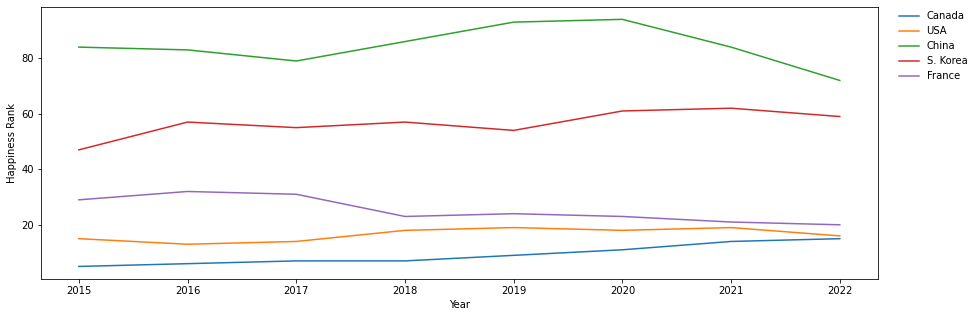

In [41]:
canada = df[df['Country'] == 'Canada'].reset_index(drop=True)
usa = df[df['Country'] == 'United States'].reset_index(drop=True)
uk = df[df['Country'] == 'Kingdom'].reset_index(drop=True)
china = df[df['Country'] == 'China'].reset_index(drop=True)
korea = df[df['Country'] == 'South Korea'].reset_index(drop=True)
france = df[df['Country'] == 'France'].reset_index(drop=True)

plt.figure(figsize=(15,5))
sns.lineplot(data=canada, x='Year', y='Happiness Rank', label='Canada')
sns.lineplot(data=usa, x='Year', y='Happiness Rank', label='USA')
sns.lineplot(data=uk, x='Year', y='Happiness Rank', label='UK')
sns.lineplot(data=china, x='Year', y='Happiness Rank', label='China')
sns.lineplot(data=korea, x='Year', y='Happiness Rank', label='S. Korea')
sns.lineplot(data=france, x='Year', y='Happiness Rank', label='France')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
           borderaxespad=0, frameon=False);

In [42]:
year = 2015

data_slider = []

for year in df['Year'].unique():
    df_segmented =  df[(df['Year']== year)].copy()

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['Country'],
                        z=df_segmented['Happiness Score'].astype(float),
                        locationmode='country names',
                        colorscale = 'Bluered_r',
                        colorbar= {'title':'Happiness Score'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Global Happiness Since 2015', 
              geo=dict(projection={'type': 'natural earth'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
iplot(fig)

### Data Grouping
To compare changes in world happiness pre- and post-pandemic, I need to split my data into two datasets. COVID-19 was in effect from 2019 to 2022. Therefore, my post-COVID dataset will group data from these four years. To prevent imbalance, a period of four years will also be selected for the pre-COVID dataset, namely 2015 to 2018.

In [43]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [44]:
# pre-covid dataset
pre_covid = df[(df.Year >= 2015) & (df.Year <= 2018)]

pre_covid = pre_covid.groupby('Country')[['Happiness Score', 
                                          'Economy (GDP per Capita)',
                                          'Family', 
                                          'Health (Life Expectancy)', 
                                          'Freedom',
                                          'Trust (Government Corruption)', 
                                          'Generosity']].mean().reset_index().sort_values(by='Happiness Score',ascending=False)
pre_covid['Happiness Rank'] = range(1,len(pre_covid)+1)
pre_covid = pre_covid.reset_index(drop=True)
pre_covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank
0,Norway,7.53775,1.527226,1.393343,0.834667,0.646811,0.344688,0.343488,1
1,Denmark,7.53250,1.400161,1.416360,0.832561,0.634449,0.434218,0.335595,2
2,Switzerland,7.51925,1.477205,1.390165,0.897398,0.632803,0.388954,0.281040,3
3,Iceland,7.51525,1.388153,1.460016,0.890681,0.624793,0.145682,0.435405,4
4,Finland,7.48000,1.361200,1.396287,0.845794,0.627920,0.399843,0.233978,5


In [45]:
# post-covid dataset
pst_covid = df[(df.Year >= 2019) & (df.Year <= 2022)]

pst_covid = pst_covid.groupby('Country')[['Happiness Score', 
                                          'Economy (GDP per Capita)',
                                          'Family', 
                                          'Health (Life Expectancy)', 
                                          'Freedom',
                                          'Trust (Government Corruption)', 
                                          'Generosity']].mean().reset_index().sort_values(by='Happiness Score',ascending=False)
pst_covid['Happiness Rank'] = range(1,len(pst_covid)+1)
pst_covid = pst_covid.reset_index(drop=True)
pst_covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank
0,Finland,7.810175,1.490797,1.362631,0.865818,0.671329,0.471464,0.136418,1
1,Denmark,7.625400,1.541237,1.356862,0.878833,0.665510,0.480565,0.222698,2
2,Switzerland,7.530725,1.608694,1.325851,0.932633,0.632739,0.406236,0.220764,3
3,Iceland,7.527375,1.531125,1.415892,0.900461,0.667245,0.155885,0.319833,4
4,Netherlands,7.453975,1.545237,1.317661,0.878669,0.617157,0.367392,0.307829,5


In [46]:
pre_covid.shape

(168, 9)

In [47]:
pst_covid.shape

(165, 9)

In [48]:
# selecting countries with happiness rankings post covid
pre_covid = pre_covid[pre_covid.Country.isin(pst_covid.Country)]
pst_covid = pst_covid[pst_covid.Country.isin(pre_covid.Country)]

In [49]:
# checking the shape of the datasets
pre_covid.shape, pst_covid.shape

((158, 9), (158, 9))

In [50]:
# ensuring that the values intersect
set(pre_covid.Country.values) == set(pst_covid.Country.values)

True

In [51]:
# recalculating Happiness Rank
pre_covid = pre_covid.sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)
pst_covid = pst_covid.sort_values(by='Happiness Score', ascending=False).reset_index(drop=True)

pre_covid['Happiness Rank'] = range(1,len(pre_covid)+1)
pst_covid['Happiness Rank'] = range(1,len(pst_covid)+1)

In [52]:
pre_covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank
0,Norway,7.53775,1.527226,1.393343,0.834667,0.646811,0.344688,0.343488,1
1,Denmark,7.53250,1.400161,1.416360,0.832561,0.634449,0.434218,0.335595,2
2,Switzerland,7.51925,1.477205,1.390165,0.897398,0.632803,0.388954,0.281040,3
3,Iceland,7.51525,1.388153,1.460016,0.890681,0.624793,0.145682,0.435405,4
4,Finland,7.48000,1.361200,1.396287,0.845794,0.627920,0.399843,0.233978,5


In [53]:
pst_covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank
0,Finland,7.810175,1.490797,1.362631,0.865818,0.671329,0.471464,0.136418,1
1,Denmark,7.625400,1.541237,1.356862,0.878833,0.665510,0.480565,0.222698,2
2,Switzerland,7.530725,1.608694,1.325851,0.932633,0.632739,0.406236,0.220764,3
3,Iceland,7.527375,1.531125,1.415892,0.900461,0.667245,0.155885,0.319833,4
4,Netherlands,7.453975,1.545237,1.317661,0.878669,0.617157,0.367392,0.307829,5


### Comparing the pre- and post-pandemic statistics

<Figure size 1440x1440 with 0 Axes>

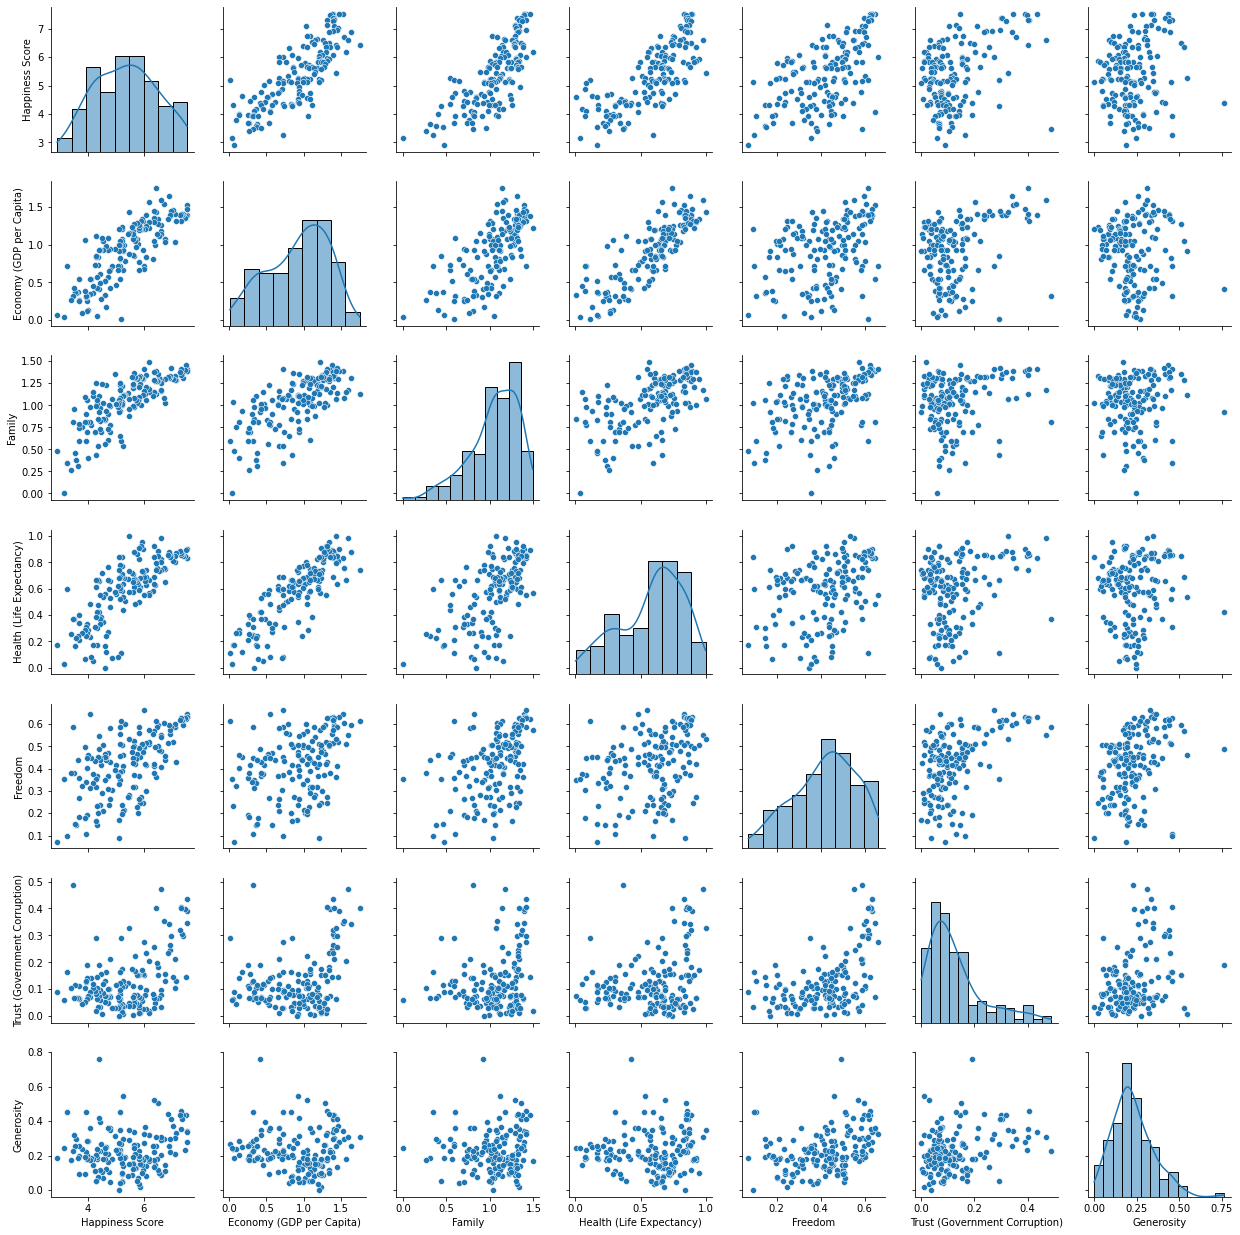

In [54]:
# pairplot: pre-covid
fig = plt.figure(figsize = (20,20))
g = sns.PairGrid(pre_covid[['Happiness Score', 'Economy (GDP per Capita)', 
                            'Family','Health (Life Expectancy)',
                            'Freedom', 'Trust (Government Corruption)',
                            'Generosity']])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot);

<Figure size 1440x1440 with 0 Axes>

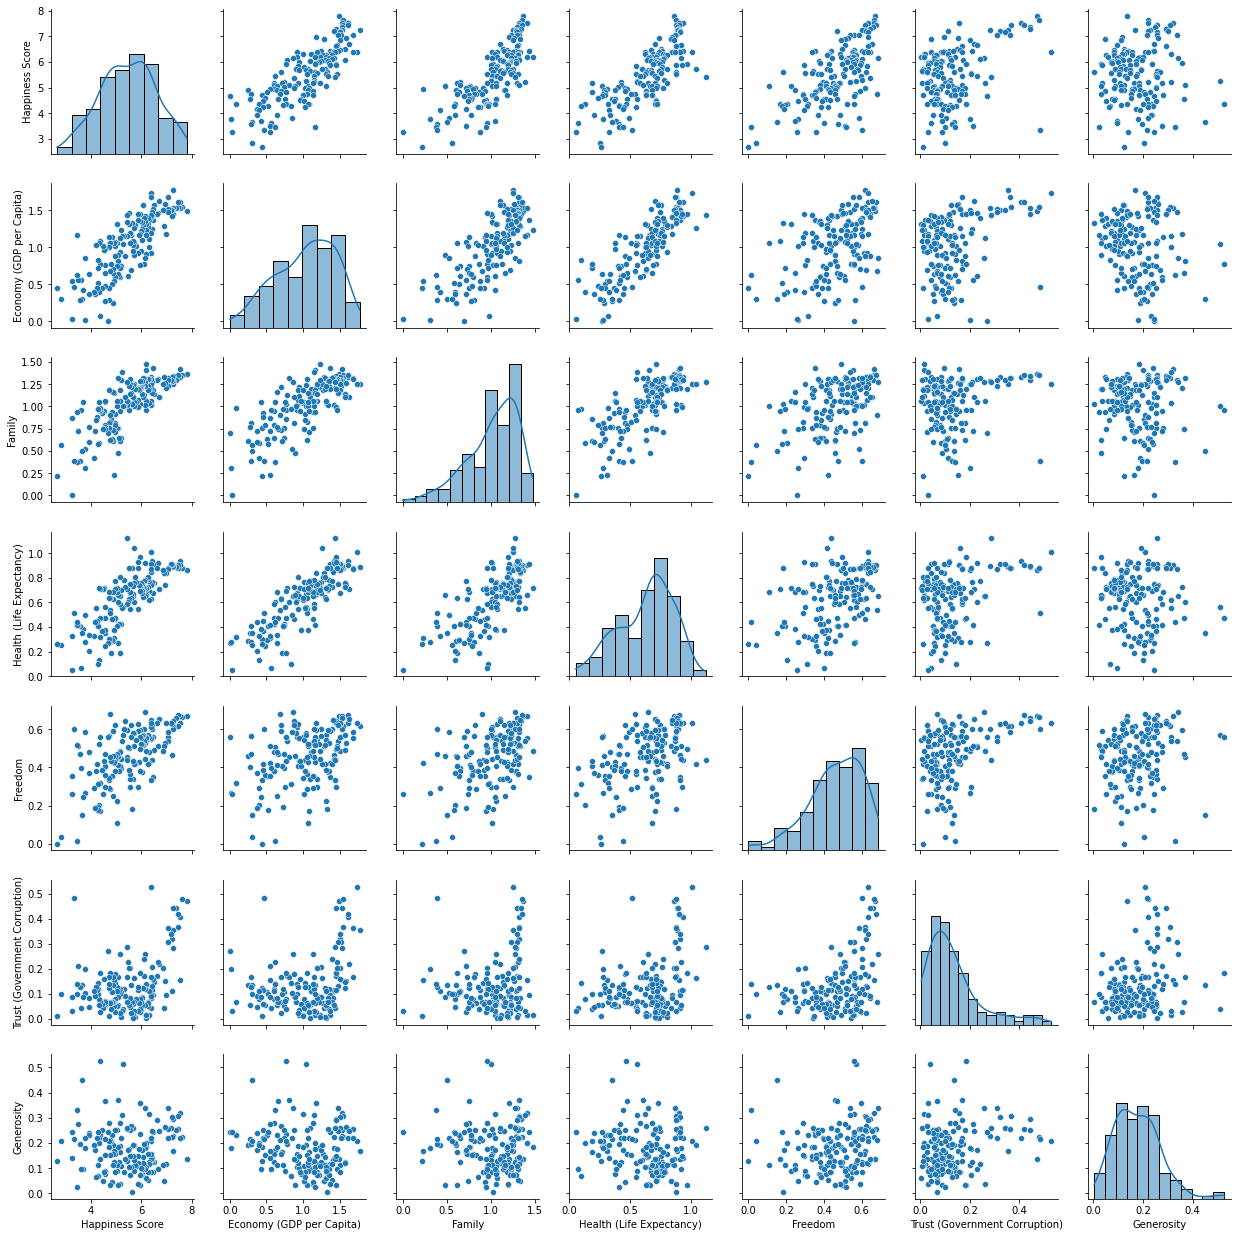

In [55]:
# pairplot: post-covid
fig = plt.figure(figsize = (20,20))
g = sns.PairGrid(pst_covid[['Happiness Score', 'Economy (GDP per Capita)', 
                            'Family','Health (Life Expectancy)',
                            'Freedom', 'Trust (Government Corruption)',
                            'Generosity']])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot);

''

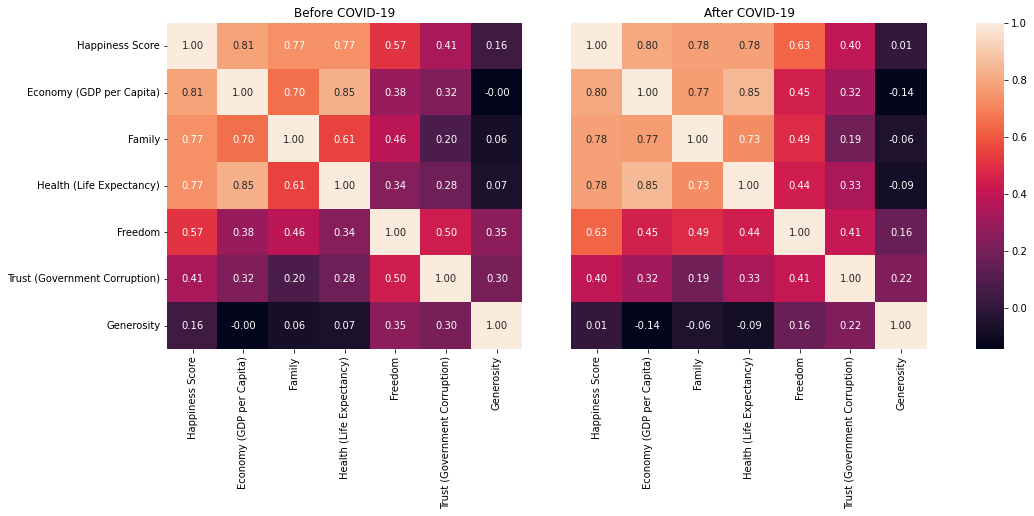

In [56]:
# correlation matrices
pre_corr = pre_covid[['Happiness Score', 'Economy (GDP per Capita)', 
                      'Family','Health (Life Expectancy)',
                      'Freedom', 'Trust (Government Corruption)',
                      'Generosity']].corr()

pst_corr = pst_covid[['Happiness Score', 'Economy (GDP per Capita)', 
                      'Family','Health (Life Expectancy)',
                      'Freedom', 'Trust (Government Corruption)',
                      'Generosity']].corr()

fig, (ax1, ax2, axcb) = plt.subplots(1, 3, figsize = (15,6),
                                    gridspec_kw={'width_ratios':[1,1,0.08]})

sns.heatmap(pre_corr, annot=True, fmt='0.2f', ax=ax1, cbar=False)
sns.heatmap(pst_corr, annot=True, fmt='0.2f', ax=ax2, cbar_ax=axcb)

ax2.set_yticklabels('')
ax2.set_yticks([])
ax1.set_title('Before COVID-19')
ax2.set_title('After COVID-19')
;

In [57]:
# concatenating the datasets to generat comparison plots with plotly
pre_covid['Period'] = 'Before'
pst_covid['Period'] = 'After'

covid = pd.concat([pre_covid, pst_covid])
covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank,Period
0,Norway,7.53775,1.527226,1.393343,0.834667,0.646811,0.344688,0.343488,1,Before
1,Denmark,7.53250,1.400161,1.416360,0.832561,0.634449,0.434218,0.335595,2,Before
2,Switzerland,7.51925,1.477205,1.390165,0.897398,0.632803,0.388954,0.281040,3,Before
3,Iceland,7.51525,1.388153,1.460016,0.890681,0.624793,0.145682,0.435405,4,Before
4,Finland,7.48000,1.361200,1.396287,0.845794,0.627920,0.399843,0.233978,5,Before


In [58]:
covid.shape

(316, 10)

In [59]:
# choropleth
data_slider = []

for period in covid['Period'].unique():
    df_segmented =  covid[(covid['Period'] == str(period))].copy()
    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_period = dict(type='choropleth',
                       locations = df_segmented['Country'],
                       z=df_segmented['Happiness Rank'].astype(float),
                       locationmode='country names',
                       colorscale = 'Bluered',
                       colorbar= {'title':'Happiness Rank'})
    data_slider.append(data_period)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Period: {}'.format('{}'.format('Before' if i==0 else 'After')))
    step['args'][1][i] = True
    steps.append(step)
  
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Global happiness before and after the pandemic', 
              geo=dict(projection={'type': 'natural earth'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
iplot(fig)

In [60]:
# Economy vs. Happiness Score
fig = px.scatter(covid, x="Economy (GDP per Capita)", y="Happiness Score", 
                 animation_frame="Period", animation_group="Country",
                 size="Happiness Rank", color="Country")

fig.update_layout(title_text = 'Happiness Score vs. GDP per Capita')
fig.show()

In [61]:
# Life Expectancy vs. Freedom to make choices
fig = px.scatter(covid, x="Health (Life Expectancy)", y="Freedom", 
                 animation_frame="Period", animation_group="Country",
                 size="Happiness Rank", color="Country")

fig.update_layout(title_text = 'Life Expectancy vs. Freedom')
fig.show()

In [62]:
# Social support vs. Generosity
fig = px.scatter(covid, x="Family", y="Generosity", 
                 animation_frame="Period", animation_group="Country",
                 size="Happiness Rank", color="Country")

fig.update_layout(title_text = 'Social support vs. Generosity')
fig.show()

### EDA conclusions

Overall, although the rank of countries in the world changed pre- and post-pandemic, most countries maintained their global standing, and countries with high happiness scores before the pandemic still achieved high scores following the onset of COVID-19.

To explore this phenomenon better, I want to try predicting happiness score using various factors and cluster countries with similar scores to determine which factors impact global happiness the most.

## Predicting Happiness Score using Machine Learning

In [63]:
# creating an aggregated dataset for machine learning
covid = pd.concat([pre_covid, pst_covid])

covid = covid.groupby('Country')[['Happiness Score', 
                                  'Economy (GDP per Capita)',
                                  'Family', 
                                  'Health (Life Expectancy)', 
                                  'Freedom',
                                  'Trust (Government Corruption)', 
                                  'Generosity']].mean().sort_values(by='Happiness Score',ascending=False).reset_index()
covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,7.645087,1.425999,1.379459,0.855806,0.649625,0.435654,0.185198
1,Denmark,7.578950,1.470699,1.386611,0.855697,0.649980,0.457391,0.279147
2,Switzerland,7.524987,1.542949,1.358008,0.915016,0.632771,0.397595,0.250902
3,Iceland,7.521313,1.459639,1.437954,0.895571,0.646019,0.150783,0.377619
4,Norway,7.493750,1.570139,1.374693,0.867842,0.661430,0.381857,0.299867


In [64]:
covid.shape

(158, 8)

In [65]:
X = covid.drop(['Country', 'Happiness Score'], axis=1)
y = covid['Happiness Score']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [67]:
# sanity check
X_train.shape, X_test.shape

((118, 6), (40, 6))

In [68]:
# helper function
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("-"*50)
    print("model = {}".format(model))
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [69]:
# Training and evaluating the models
model_lr = LinearRegression()
model_svr = SVR()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_nn = MLPRegressor()

models = [model_lr, model_svr, model_dt, model_rf, model_nn]
for model in models:
  run_experiment(model)

--------------------------------------------------
model = LinearRegression()
R^2 :  0.7709010071453656
MAE : 0.3875523524898802
RMSE: 0.4832785262107067
--------------------------------------------------
model = SVR()
R^2 :  0.7947590307313542
MAE : 0.3629996403233455
RMSE: 0.45742293568167985
--------------------------------------------------
model = DecisionTreeRegressor()
R^2 :  0.6110117211405464
MAE : 0.4927592699734896
RMSE: 0.6297296847242317
--------------------------------------------------
model = RandomForestRegressor()
R^2 :  0.7983764450023481
MAE : 0.35556381830924944
RMSE: 0.4533739285893987
--------------------------------------------------
model = MLPRegressor()
R^2 :  0.7644734512536411
MAE : 0.3909143221129761
RMSE: 0.49001101473795383


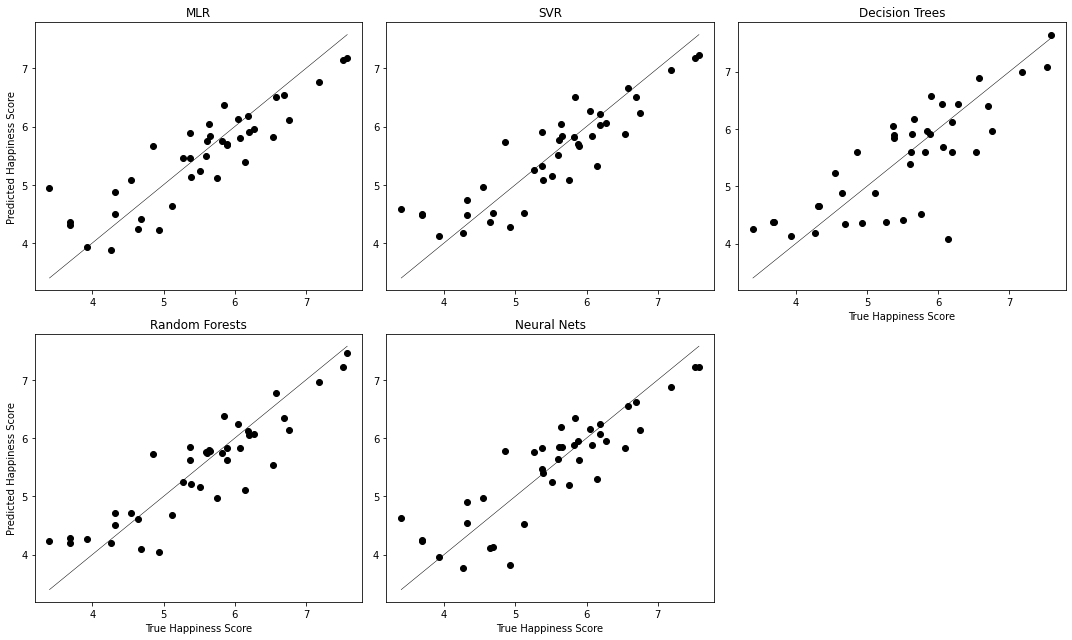

In [70]:
# Regression plots

y_pred_lr = model_lr.predict(X_test)
y_pred_svr = model_svr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_nn = model_nn.predict(X_test)

fig, ax = plt.subplots(2, 3, figsize=(15, 9))
ax[0,0].scatter(x = y_test, y = y_pred_lr, c = 'k')
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("Predicted Happiness Score")
ax[0,0].set_title("MLR")
ax[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=0.5)

ax[0,1].scatter(x = y_test, y = y_pred_svr, c = 'k')
ax[0,1].set_title("SVR")
ax[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=0.5)
ax[0,1].set_xlabel("", c = 'k')
ax[0,1].set_ylabel("")

ax[0,2].scatter(x = y_test, y = y_pred_dt, c = 'k')
ax[0,2].set_title("Decision Trees")
ax[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=0.5)
ax[0,2].set_xlabel("True Happiness Score")
ax[0,2].set_ylabel("")

ax[1,0].scatter(x = y_test, y = y_pred_rf, c = 'k')
ax[1,0].set_title("Random Forests")
ax[1,0].set_xlabel("True Happiness Score")
ax[1,0].set_ylabel("Predicted Happiness Score")
ax[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=0.5)

ax[1,1].scatter(x = y_test, y = y_pred_nn, c = 'k')
ax[1,1].set_title("Neural Nets")
ax[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=0.5)
ax[1,1].set_xlabel("True Happiness Score")
ax[1,1].set_ylabel("")

ax[1,2].axis('off')

plt.tight_layout()
plt.show()

### Regression Analysis Conclusions
Overall, the SVR and Random Forest models performed better than other regression models with $R^2≈0.8$. The Decision Tree Regressor performed poorly compared to other models with an $R^2≈0.6$.

## Clustering Analysis on Global Happiness using KMeans

In [71]:
# Feature engineering
covid['Happiness Rank'] = range(1,len(covid)+1)
covid.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank
0,Finland,7.645087,1.425999,1.379459,0.855806,0.649625,0.435654,0.185198,1
1,Denmark,7.578950,1.470699,1.386611,0.855697,0.649980,0.457391,0.279147,2
2,Switzerland,7.524987,1.542949,1.358008,0.915016,0.632771,0.397595,0.250902,3
3,Iceland,7.521313,1.459639,1.437954,0.895571,0.646019,0.150783,0.377619,4
4,Norway,7.493750,1.570139,1.374693,0.867842,0.661430,0.381857,0.299867,5


In [72]:
# I will be using the same features and target datasets that I created in the regression analysis
X = covid.drop(['Country', 'Happiness Rank'], axis=1)
X.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.645087,1.425999,1.379459,0.855806,0.649625,0.435654,0.185198
1,7.578950,1.470699,1.386611,0.855697,0.649980,0.457391,0.279147
2,7.524987,1.542949,1.358008,0.915016,0.632771,0.397595,0.250902
3,7.521313,1.459639,1.437954,0.895571,0.646019,0.150783,0.377619
4,7.493750,1.570139,1.374693,0.867842,0.661430,0.381857,0.299867


In [73]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [74]:
scaled_data.shape

(158, 7)

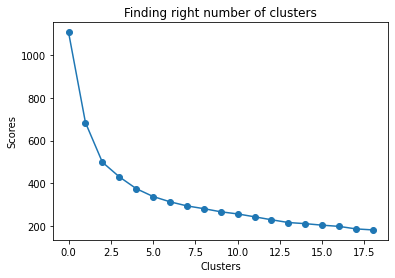

In [75]:
scores = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'o-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

__Note:__ The 3rd cluster seems to be forming the elbow of the curve. Conseuently, I will set the number of clusters to 3.

In [76]:
# apply kmeans
kmeans = KMeans(3)
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [77]:
labels = kmeans.labels_

In [78]:
kmeans.cluster_centers_.shape

(3, 7)

In [79]:
kmeans.cluster_centers_

array([[ 0.20949004,  0.32409297,  0.38062993,  0.37144208, -0.00897889,
        -0.42188421, -0.41682417],
       [-1.09134408, -1.17288942, -1.14195592, -1.18131989, -0.56191788,
        -0.13677207,  0.24369174],
       [ 1.43514785,  1.20991087,  0.95931704,  1.06734158,  1.1315281 ,
         1.68560418,  0.92289341]])

In [80]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [X.columns])
cluster_centers      

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.209490,0.324093,0.380630,0.371442,-0.008979,-0.421884,-0.416824
1,-1.091344,-1.172889,-1.141956,-1.181320,-0.561918,-0.136772,0.243692
2,1.435148,1.209911,0.959317,1.067342,1.131528,1.685604,0.922893


In [81]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [X.columns])
cluster_centers


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,5.651711,1.104675,1.141907,0.695715,0.439568,0.086007,0.159455
1,4.240577,0.494491,0.716979,0.335200,0.363598,0.115592,0.227270
2,6.981295,1.465742,1.303409,0.857287,0.596266,0.304690,0.297003


__Insights:__ <br>
- Cluster 0: countries that have GDP in the range of 0.5 to 1.1 and have medium social support, life expectancy, and freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have low GDP, low social support and low life expectancy. These counties have low freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have high GDPs, life expectancies and  social support. These counties have high freedom to make life choices, high generosity and high perception of corruption.

In [82]:
# cluster assignment
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [83]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([covid, pd.DataFrame({'Cluster':labels})], axis = 1)
df_cluster.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Rank,Cluster
0,Finland,7.645087,1.425999,1.379459,0.855806,0.649625,0.435654,0.185198,1,2
1,Denmark,7.578950,1.470699,1.386611,0.855697,0.649980,0.457391,0.279147,2,2
2,Switzerland,7.524987,1.542949,1.358008,0.915016,0.632771,0.397595,0.250902,3,2
3,Iceland,7.521313,1.459639,1.437954,0.895571,0.646019,0.150783,0.377619,4,2
4,Norway,7.493750,1.570139,1.374693,0.867842,0.661430,0.381857,0.299867,5,2


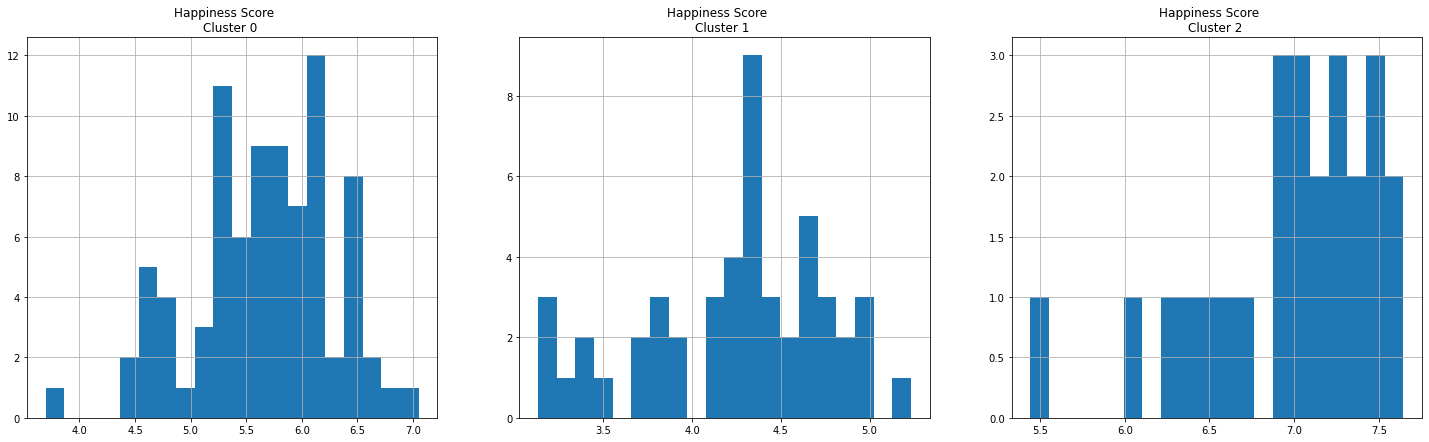

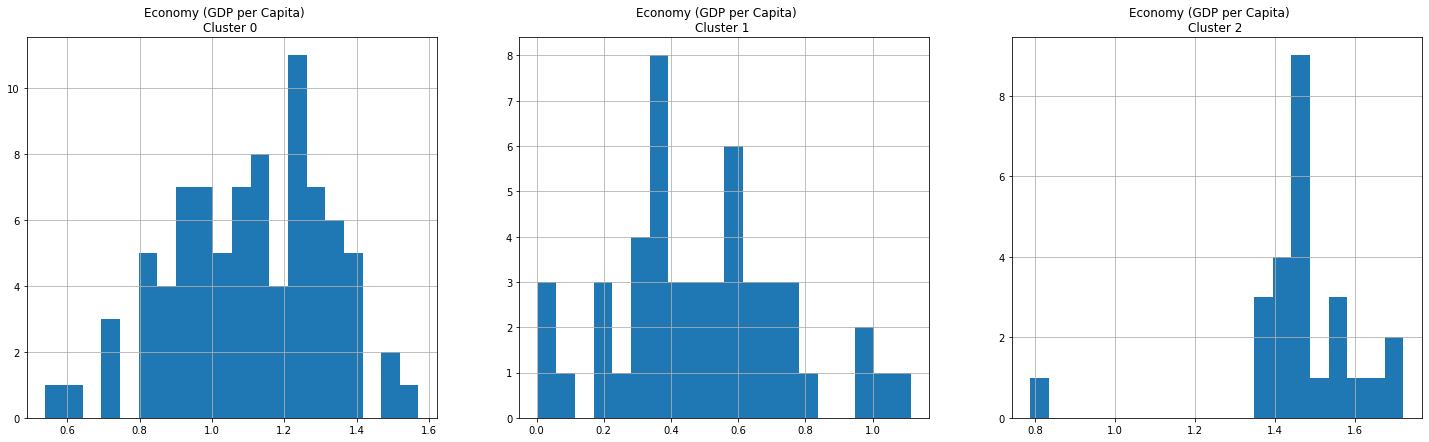

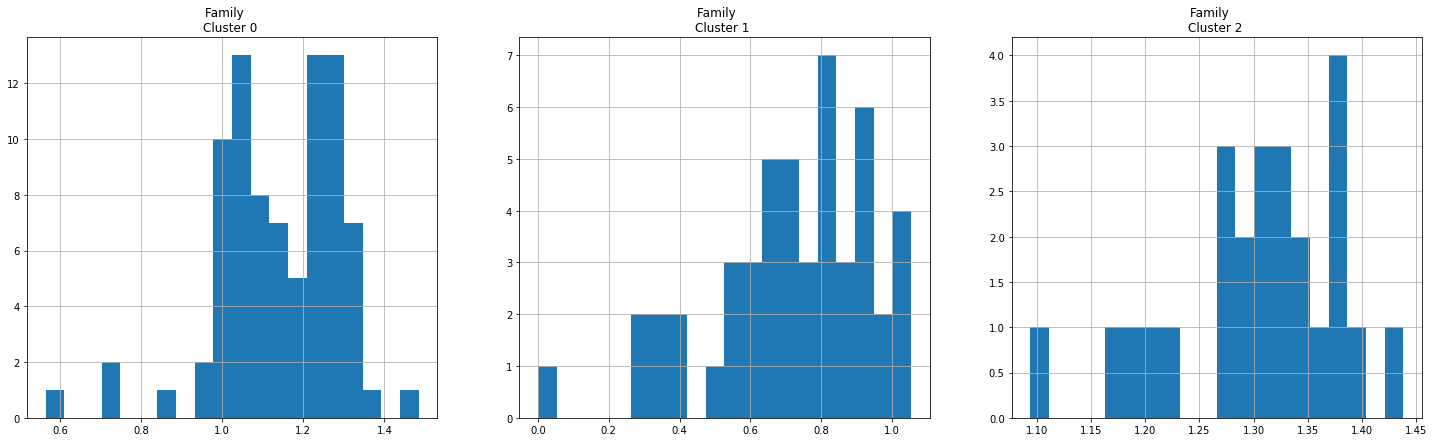

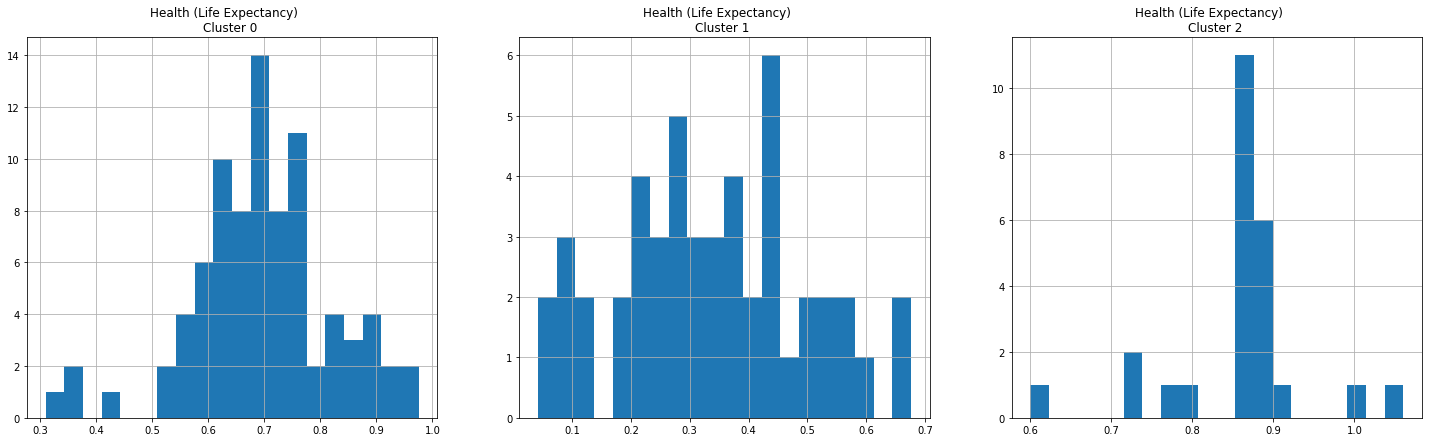

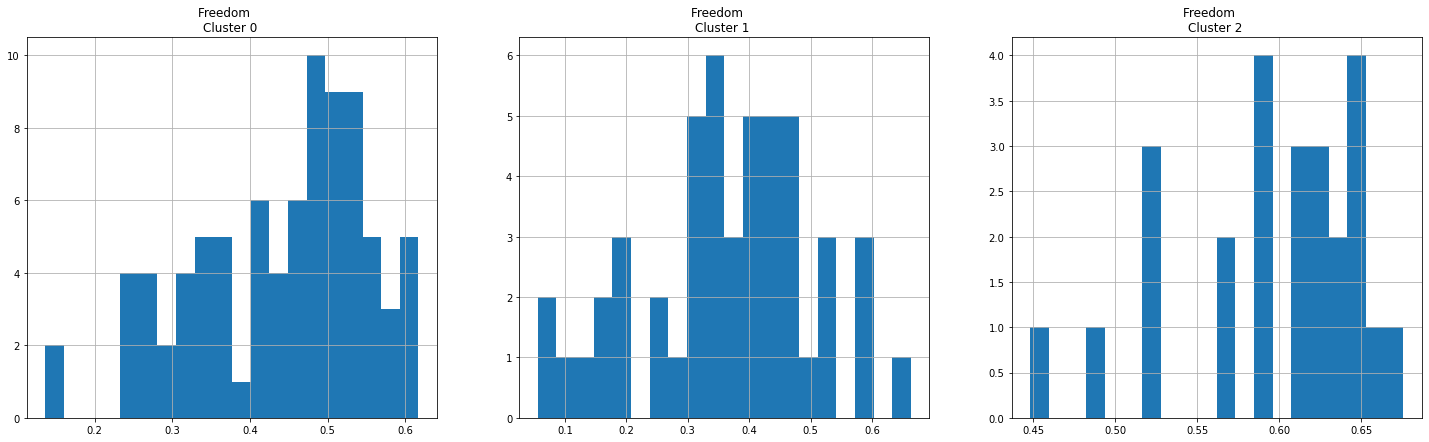

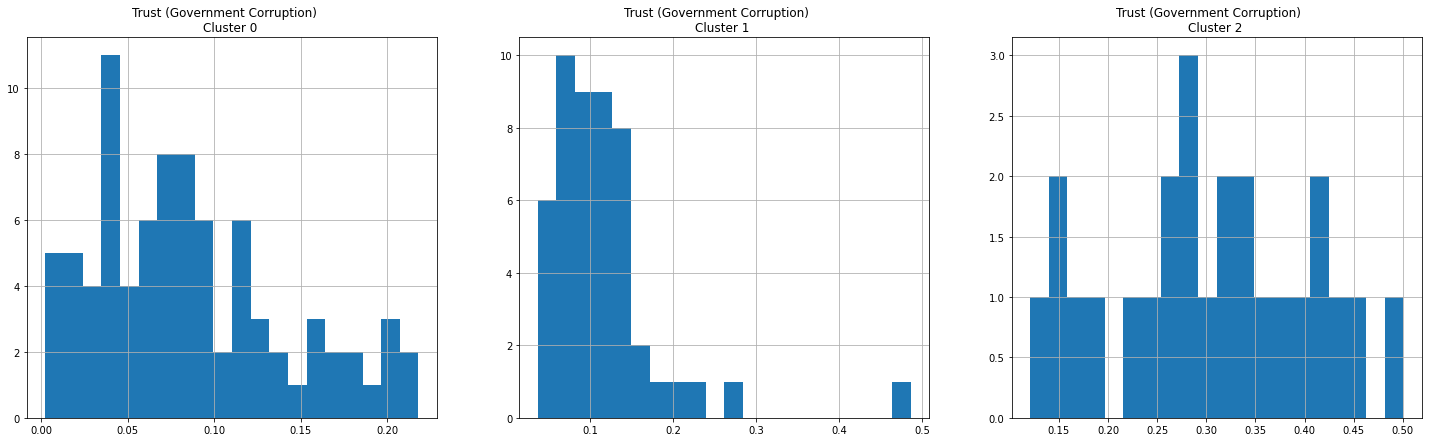

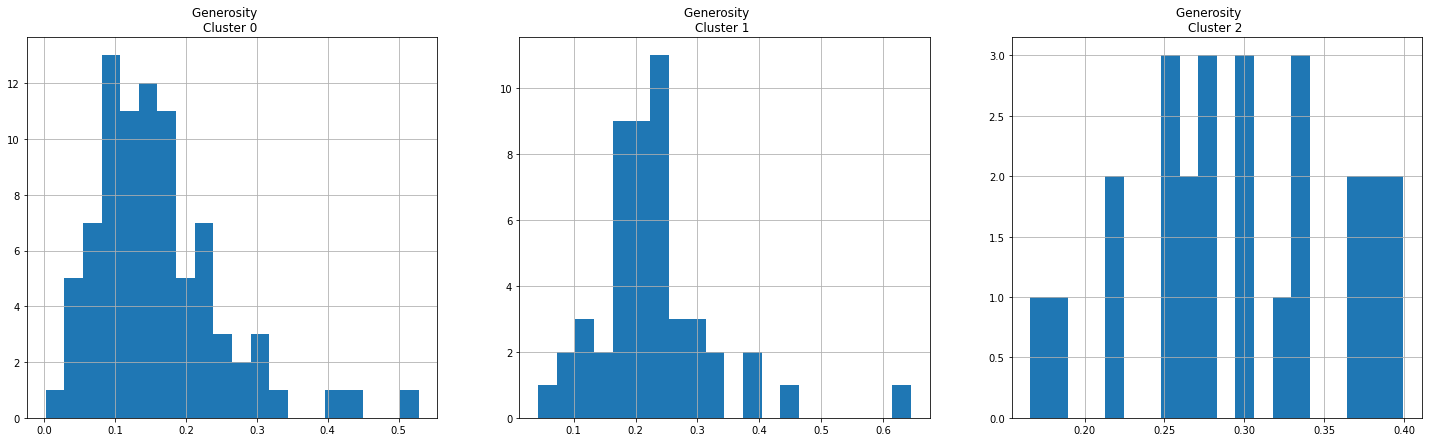

In [84]:
# Plot the histogram of various clusters
for i in X.columns:
  plt.figure(figsize = (25, 7))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df_cluster[df_cluster['Cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()

### Visualizing the clusters

In [85]:
# plotting the relationship between cluster and happiness score 
fig = px.scatter(df_cluster, x = 'Cluster', y = "Happiness Score",
                 size = 'Happiness Rank', color = "Country", 
                 hover_name = "Country")

fig.update_layout(title_text = 'Happiness Score vs Cluster')
fig.show()

In [86]:
# plotting the relationship between cluster and GDP
fig = px.scatter(df_cluster, x='Cluster', y='Economy (GDP per Capita)',
                 size='Happiness Rank', color="Country", 
                 hover_name="Country", trendline= "ols")

fig.update_layout(title_text='GDP vs Clusters')
fig.show()

In [87]:
# visaulizing the clusters with respect to economy, corruption, life expectancy, rank and their scores
figure = bubbleplot(dataset=df_cluster, 
    x_column='Economy (GDP per Capita)', y_column='Trust (Government Corruption)', bubble_column='Country',  
    color_column='Cluster', z_column='Health (Life Expectancy)', size_column='Happiness Score',
    x_title="Economy", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollZoom': True})

In [88]:
# visaulizing the clusters with respect to economy, corruption, generosity, rank and their scores
figure = bubbleplot(dataset=df_cluster, 
    x_column='Economy (GDP per Capita)', y_column='Trust (Government Corruption)', bubble_column='Country',  
    color_column='Cluster', z_column='Generosity', size_column='Happiness Score',
    x_title="Economy", y_title="Corruption", z_title="Generosity",
    title='Clusters based Impact of Economy, Corruption and Generosity on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollZoom': True})

In [89]:
# visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = df_cluster["Country"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df_cluster['Cluster'], 
           text = df_cluster["Country"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'natural earth'}))

fig = go.Figure(data = [data], layout=layout)
iplot(fig)

### Cluster Analysis Summary

In general, developed countries, including the US, Canada, Australia and Scandinavian countries (Norway, Findland) have the highest happiness scores across the globe. 

On the other hand, third wold countries, particularly African nations, are reportedly the least happy in the world. 

Interestingly, global happiness is highly correlated with a countrie's GDP, which in turn influences other factors considered, including life expectancy and generosity. Therefore, a bias likely exists in the way we as humans determine happiness on the global scale.
